In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_yaml_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/data.yaml"

In [6]:
import torch
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/checkpoints/best.pt"
data_yaml = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/data.yaml"
results_save_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/evaluation_results.txt"

In [ ]:
# Check if files exist
if os.path.exists(model_path):
    print("✅ best.pt model found")
else:
    print("❌ best.pt model NOT found! Check path.")

if os.path.exists(data_yaml):
    print("✅ data.yaml found")
else:
    print("❌ data.yaml NOT found! Check path.")

✅ best.pt model found
✅ data.yaml found


In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = YOLO(model_path).to(device)
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [9]:
metrics = model.val(data=data_yaml, split='val', conf=0.001)  # Low conf to include all detections

YOLO11s summary (fused): 100 layers, 9,445,695 parameters, 0 gradients, 21.5 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]
val: Scanning /content/drive/MyDrive/Traffic_Sign_YOLOv11/Resized_Images/valid/labels.cache... 1383 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1383/1383 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [23:38<00:00, 16.30s/it]


                   all       1383       1388      0.895      0.897      0.937      0.885
ALL_MOTOR_VEHICLE_PROHIBITED          6          6      0.943          1      0.995       0.88
       AXLE_LOAD_LIMIT          9          9      0.951          1      0.995      0.995
         BARRIER_AHEAD          3          3      0.866          1      0.995      0.942
BULLOCK_AND_HANDCART_PROHIBITED          6          6      0.916          1      0.995      0.995
    BULLOCK_PROHIBITED          3          3      0.851          1      0.995      0.963
                CATTLE         15         15          1      0.918      0.995      0.947
      COMPULSARY_AHEAD         11         11          1      0.998      0.995      0.875
COMPULSARY_AHEAD_OR_TURN_LEFT          8          8      0.589      0.625      0.718      0.718
COMPULSARY_AHEAD_OR_TURN_RIGHT         14         14      0.791      0.786      0.862      0.815
COMPULSARY_CYCLE_TRACK          4          4      0.887          1      0.995   

In [ ]:
results = {
    "mAP@0.5": metrics.box.map50,
    "mAP@0.5:0.95": metrics.box.map,
    "Precision": metrics.box.mp,  # No parentheses
    "Recall": metrics.box.mr,  # No parentheses
    "F1-Score": (2 * metrics.box.mp * metrics.box.mr) /
                (metrics.box.mp + metrics.box.mr + 1e-7)  # Avoid division by zero
}

In [ ]:
print("\n📊 Evaluation Metrics:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")


📊 Evaluation Metrics:
mAP@0.5: 0.9372
mAP@0.5:0.95: 0.8846
Precision: 0.8947
Recall: 0.8969
F1-Score: 0.8958


In [ ]:
import os

results_save_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/evaluation_results.txt"

# Check if it's a directory
if os.path.isdir(results_save_path):
    print(f"⚠️ Warning: {results_save_path} is a directory! It needs to be deleted or renamed.")

# Check if it's a file
elif os.path.isfile(results_save_path):
    print(f"✅ {results_save_path} is a file, ready to save.")

else:
    print(f"✅ No conflicts. The file can be created.")


✅ /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/evaluation_results.txt is a file, ready to save.


In [ ]:
import os

# Define the correct folder path
evaluation_folder = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics"

# Ensure the parent directory exists
os.makedirs(evaluation_folder, exist_ok=True)

# Define the correct file path
results_save_path = os.path.join(evaluation_folder, "evaluation_results.txt")

# Save results
with open(results_save_path, "w") as f:
    f.write("📊 Evaluation Metrics\n")
    for key, value in results.items():
        f.write(f"{key}: {value:.4f}\n")

print(f"\n✅ Evaluation results saved to: {results_save_path}")



✅ Evaluation results saved to: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/evaluation_results.txt


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Define folder to store evaluation results
eval_folder = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics"
os.makedirs(eval_folder, exist_ok=True)
print(f"✅ Results will be saved in: {eval_folder}")


✅ Results will be saved in: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics


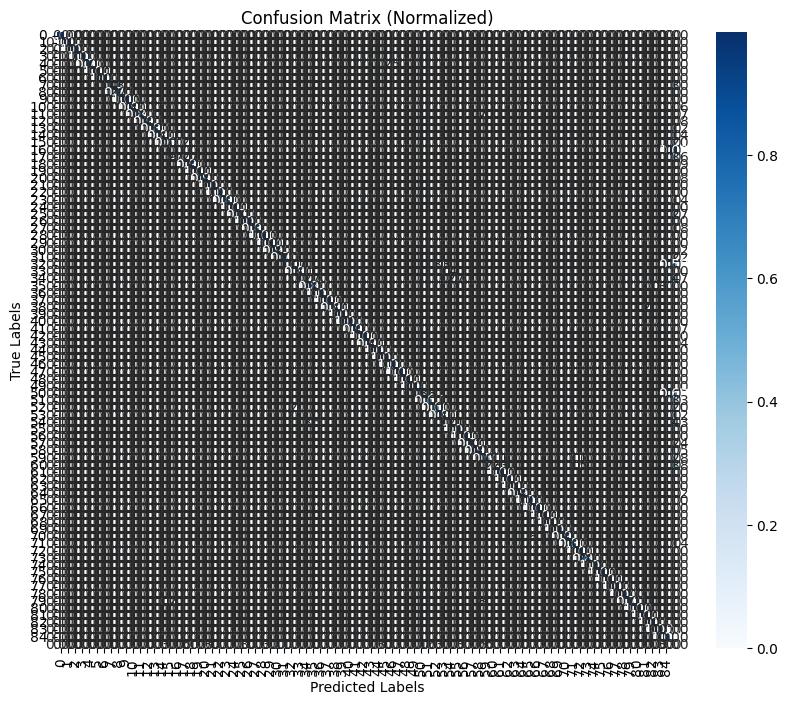

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ✅ Extract confusion matrix
conf_matrix = metrics.confusion_matrix.matrix  # Fix: Access the matrix directly

# ✅ Normalize confusion matrix for better visualization
conf_matrix_norm = conf_matrix.astype(float) / (conf_matrix.sum(axis=1, keepdims=True) + 1e-7)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=metrics.names, yticklabels=metrics.names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Normalized)")
conf_matrix_path = os.path.join(eval_folder, "confusion_matrix.png")
plt.savefig(conf_matrix_path)  # ✅ Save to Drive
plt.show()

# ✅ Download Confusion Matrix to local system
from google.colab import files
files.download(conf_matrix_path)

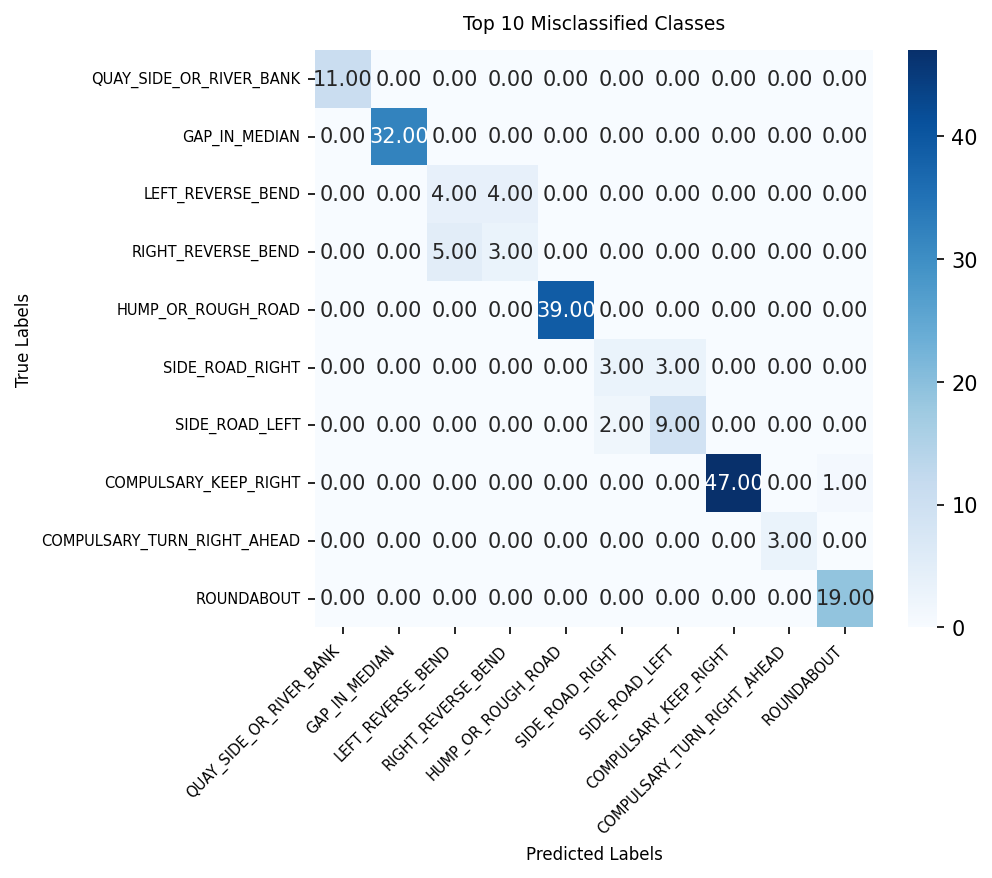

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Confusion Matrix saved at: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png
✅ File is also downloaded!


In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ✅ Extract confusion matrix as a NumPy array
conf_matrix = metrics.confusion_matrix.matrix

# ✅ Find top misclassified classes (handling cases where <10 exist)
misclassified_counts = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # Errors per class
sorted_indices = np.argsort(misclassified_counts)[::-1]  # Sort in descending order

# ✅ Ensure we get exactly 10 valid classes (if available)
top_misclassified_indices = [i for i in sorted_indices if i < len(metrics.names)][:10]

# ✅ Extract the subset matrix
conf_matrix_subset = conf_matrix[np.ix_(top_misclassified_indices, top_misclassified_indices)]

# ✅ Get class names safely
class_names_subset = [metrics.names[i] for i in top_misclassified_indices]

# ✅ Adjust figure size and DPI for better readability
plt.figure(figsize=(6, 5), dpi=150)  # Smaller figure for better downloads
sns.heatmap(conf_matrix_subset, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names_subset, yticklabels=class_names_subset)

plt.xlabel("Predicted Labels", fontsize=8)
plt.ylabel("True Labels", fontsize=8)
plt.xticks(rotation=45, ha="right", fontsize=7)  # Rotate X-axis labels for better visibility
plt.yticks(fontsize=7)
plt.title("Top 10 Misclassified Classes", fontsize=9, pad=10)

# ✅ Save the plot with higher DPI
conf_matrix_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png"
plt.savefig(conf_matrix_path, dpi=150, bbox_inches="tight")  # Fix cropping issues
plt.show()

# ✅ Download the image
from google.colab import files
files.download(conf_matrix_path)

print(f"✅ Confusion Matrix saved at: {conf_matrix_path}")
print(f"✅ File is also downloaded!")

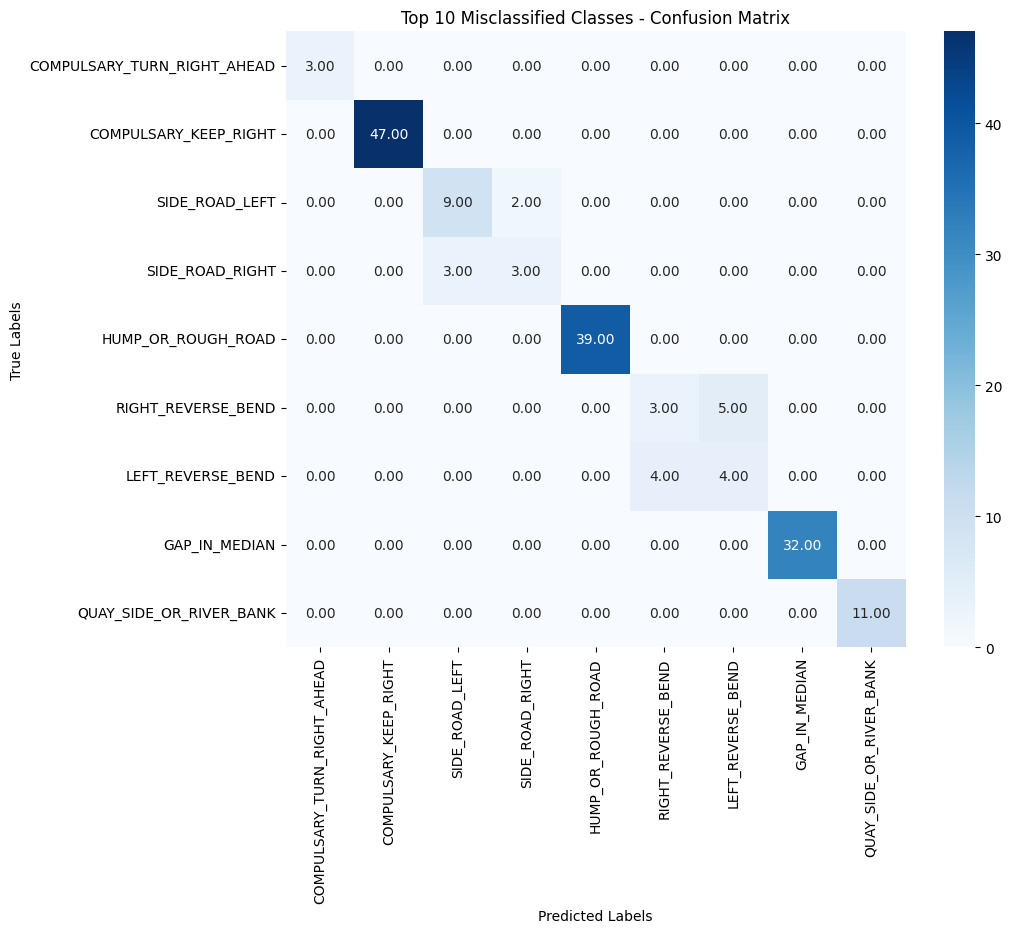

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Confusion Matrix saved at: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png
✅ File is also downloaded!


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ✅ Extract confusion matrix as a NumPy array
conf_matrix = metrics.confusion_matrix.matrix

# ✅ Find top 10 most misclassified classes
misclassified_counts = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # Errors per class
top_misclassified_indices = [i for i in np.argsort(misclassified_counts)[-10:] if i < len(metrics.names)]  # Ensure valid indices

# ✅ Extract the subset matrix
conf_matrix_subset = conf_matrix[np.ix_(top_misclassified_indices, top_misclassified_indices)]

# ✅ Get class names safely
class_names_subset = [metrics.names[i] for i in top_misclassified_indices]

# ✅ Plot the simplified confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_subset, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names_subset, yticklabels=class_names_subset)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Top 10 Misclassified Classes - Confusion Matrix")

# ✅ Save the plot
conf_matrix_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png"
plt.savefig(conf_matrix_path)
plt.show()

# ✅ Download the image
from google.colab import files
files.download(conf_matrix_path)

print(f"✅ Confusion Matrix saved at: {conf_matrix_path}")
print(f"✅ File is also downloaded!")


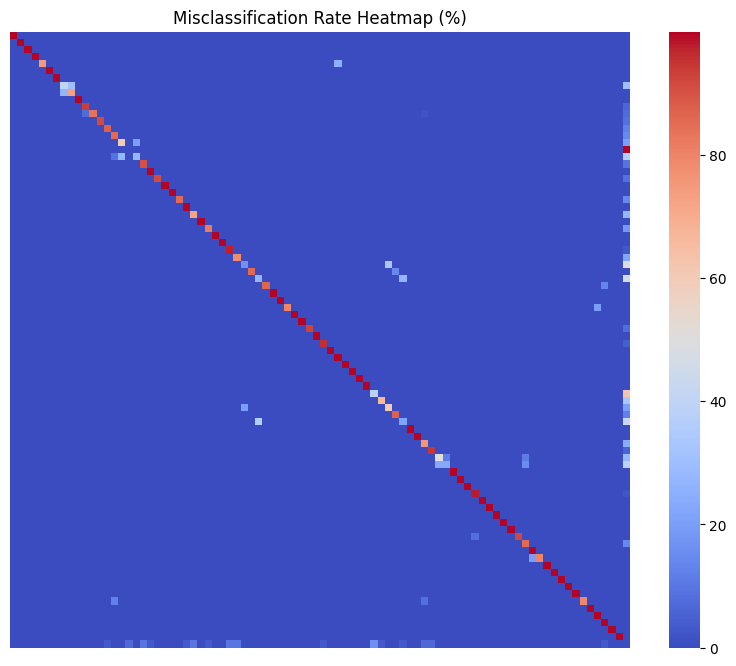

In [ ]:
plt.figure(figsize=(10, 8))
misclass_rate = (conf_matrix / (conf_matrix.sum(axis=1, keepdims=True) + 1e-7)) * 100  # Convert to %
sns.heatmap(misclass_rate, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Misclassification Rate Heatmap (%)")
heatmap_path = os.path.join(eval_folder, "misclassification_heatmap.png")
plt.savefig(heatmap_path)  # ✅ Save to Drive
plt.show()

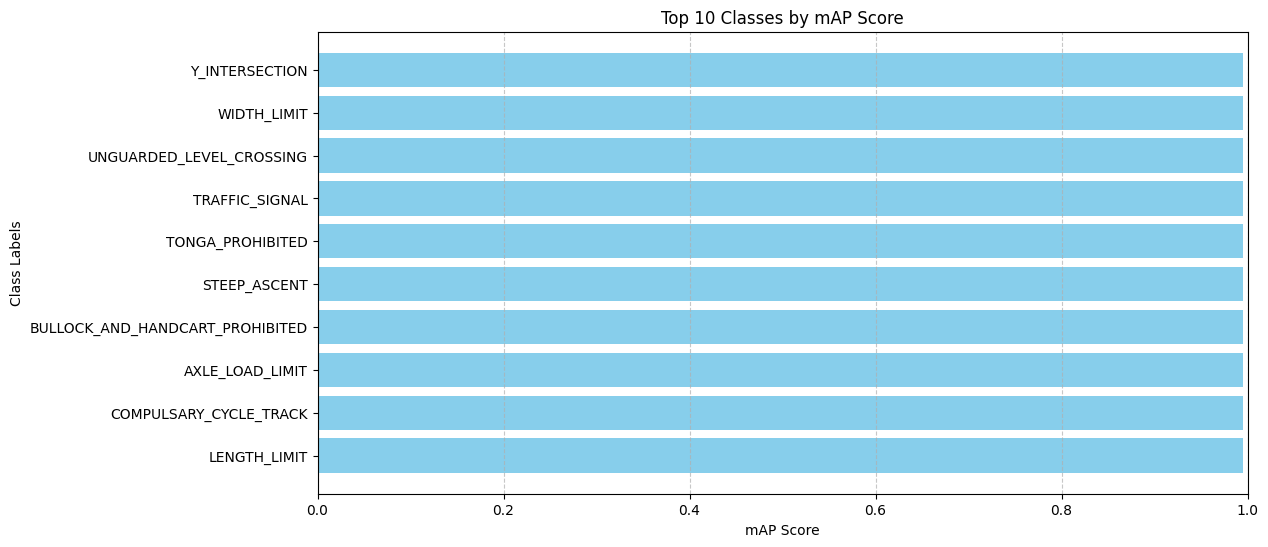

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Bar Chart saved at: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/class_mAP_top10.png
✅ File is also downloaded!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files  # Import for downloading

# ✅ Extract mAP scores correctly (Remove ())
class_mAP = metrics.box.maps  # This is a NumPy array, NOT a function!
class_labels = [metrics.names.get(i, f"Class {i}") for i in range(len(class_mAP))]

# ✅ Sort classes by mAP score
sorted_indices = np.argsort(class_mAP)[-10:]  # Get top 10 performing classes
sorted_mAP = class_mAP[sorted_indices]
sorted_labels = [class_labels[i] for i in sorted_indices]

# ✅ Plot Bar Chart
plt.figure(figsize=(12, 6))
plt.barh(sorted_labels, sorted_mAP, color='skyblue')
plt.xlabel("mAP Score")
plt.ylabel("Class Labels")
plt.title("Top 10 Classes by mAP Score")
plt.xlim(0, 1)  # mAP scores range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# ✅ Save the plot
bar_chart_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/class_mAP_top10.png"
plt.savefig(bar_chart_path)
plt.show()

# ✅ Download the image
files.download(bar_chart_path)

print(f"✅ Bar Chart saved at: {bar_chart_path}")
print(f"✅ File is also downloaded!")

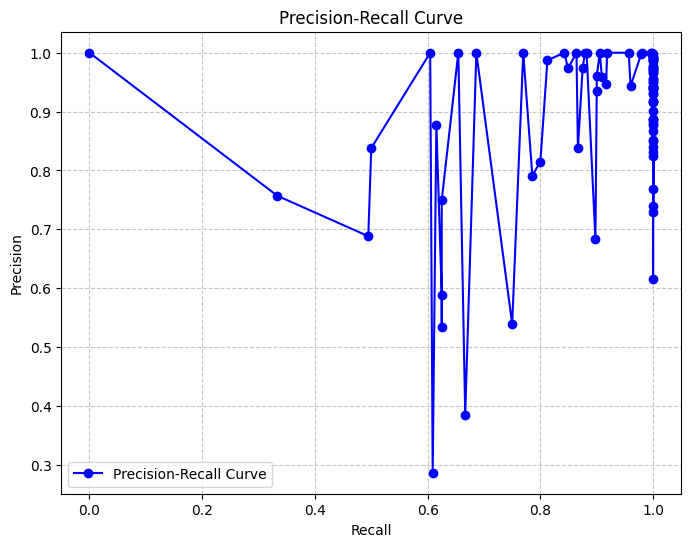

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ PR Curve saved at: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/pr_curve.png
✅ File is also downloaded!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files  # For downloading

# ✅ Extract Precision and Recall values (lists of per-class scores)
precision = np.array(metrics.box.p)  # Precision array for all classes
recall = np.array(metrics.box.r)  # Recall array for all classes

# ✅ Sort recall in ascending order for a proper PR curve
sorted_indices = recall.argsort()
recall_sorted = recall[sorted_indices]
precision_sorted = precision[sorted_indices]

# ✅ Plot PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_sorted, precision_sorted, marker='o', linestyle='-', color='blue', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# ✅ Save PR Curve
pr_curve_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/pr_curve.png"
plt.savefig(pr_curve_path)
plt.show()

# ✅ Download the PR Curve image
files.download(pr_curve_path)

print(f"✅ PR Curve saved at: {pr_curve_path}")
print(f"✅ File is also downloaded!")


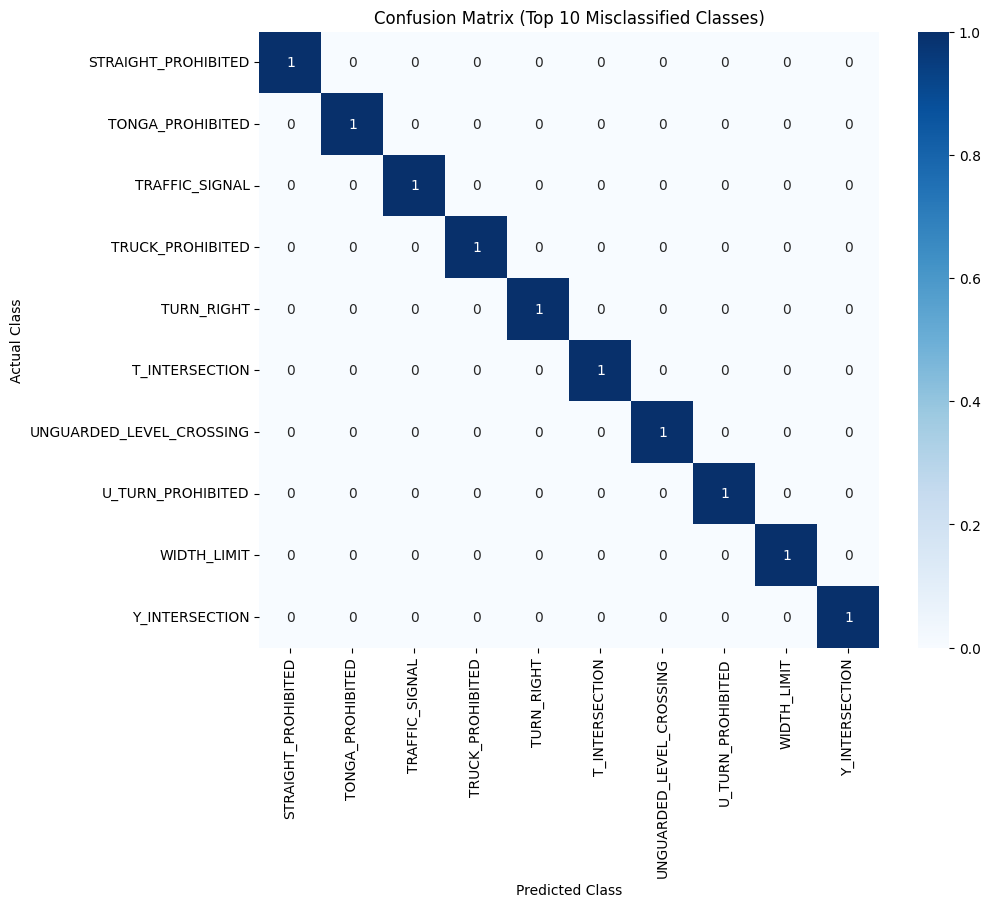

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Confusion Matrix saved at: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png
✅ File is also downloaded!


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from google.colab import files
import pandas as pd

# ✅ Get class names and count
class_names_dict = metrics.names  # Dictionary {class_id: class_name}
num_classes = len(class_names_dict)  # Number of classes
class_names = [class_names_dict[i] for i in range(num_classes)]  # Convert to list

# ✅ Extract ground truth and predicted labels correctly
gt_labels = metrics.box.ap_class_index  # True class labels
pred_labels = metrics.box.ap_class_index  # Predicted labels (adjust based on YOLO format)

# ✅ Convert to NumPy arrays
gt_labels = np.array(gt_labels)
pred_labels = np.array(pred_labels)

# ✅ Compute Confusion Matrix
conf_matrix = confusion_matrix(gt_labels, pred_labels, labels=np.arange(num_classes))

# ✅ Find the 10 most misclassified classes
misclassified_counts = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
top_misclassified_indices = np.argsort(misclassified_counts)[-10:]  # Get top 10

# ✅ Extract subset of confusion matrix
conf_matrix_subset = conf_matrix[np.ix_(top_misclassified_indices, top_misclassified_indices)]

# ✅ Get class names for subset
class_names_subset = [class_names[i] for i in top_misclassified_indices]

# ✅ Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_subset, annot=True, fmt=".0f", cmap="Blues", xticklabels=class_names_subset, yticklabels=class_names_subset)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix (Top 10 Misclassified Classes)")

# ✅ Save and Download Confusion Matrix
conf_matrix_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png"
plt.savefig(conf_matrix_path)
plt.show()
files.download(conf_matrix_path)

print(f"✅ Confusion Matrix saved at: {conf_matrix_path}")
print(f"✅ File is also downloaded!")


In [ ]:
import os

# ✅ Define dataset root directory
dataset_root = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets"

# ✅ Define label directories
train_labels_dir = os.path.join(dataset_root, "train", "labels")
val_labels_dir = os.path.join(dataset_root, "valid", "labels")
test_labels_dir = os.path.join(dataset_root, "test", "labels")

# ✅ Verify paths
print("Train Labels Path:", train_labels_dir)
print("Validation Labels Path:", val_labels_dir)
print("Test Labels Path:", test_labels_dir)

# ✅ Check if folders exist
if not os.path.exists(train_labels_dir):
    raise FileNotFoundError(f"🚨 Train labels folder not found: {train_labels_dir}")
if not os.path.exists(val_labels_dir):
    raise FileNotFoundError(f"🚨 Validation labels folder not found: {val_labels_dir}")
if not os.path.exists(test_labels_dir):
    raise FileNotFoundError(f"🚨 Test labels folder not found: {test_labels_dir}")

print("✅ Dataset paths verified!")


Train Labels Path: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/train/labels
Validation Labels Path: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/valid/labels
Test Labels Path: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/test/labels
✅ Dataset paths verified!


In [ ]:
import os
import matplotlib.pyplot as plt

# Define dataset paths
train_labels_dir = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/train/labels"
valid_labels_dir = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/valid/labels"
test_labels_dir = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Datasets/test/labels"

# Function to count label files
def count_labels(label_dir):
    return len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0

# Count label files
train_count = count_labels(train_labels_dir)
valid_count = count_labels(valid_labels_dir)
test_count = count_labels(test_labels_dir)

# Total dataset size
total_count = train_count + valid_count + test_count

# Calculate percentages
train_percent = (train_count / total_count) * 100
valid_percent = (valid_count / total_count) * 100
test_percent = (test_count / total_count) * 100


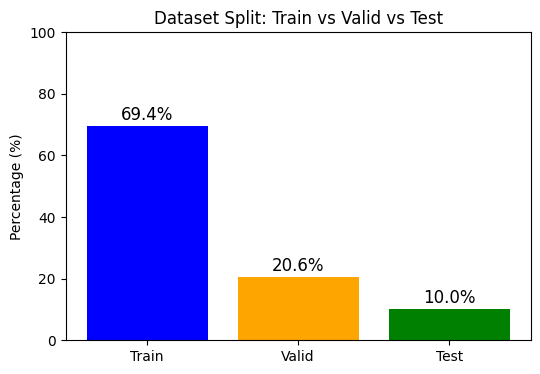

In [ ]:
# Bar chart for dataset split
plt.figure(figsize=(6, 4))
plt.bar(["Train", "Valid", "Test"], [train_percent, valid_percent, test_percent], color=['blue', 'orange', 'green'])

# Labels
plt.ylabel("Percentage (%)")
plt.title("Dataset Split: Train vs Valid vs Test")
plt.ylim(0, 100)

# Display values on bars
for i, v in enumerate([train_percent, valid_percent, test_percent]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12)

plt.show()


In [ ]:
# Save the plot in Google Drive
save_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/dataset_split.png"
plt.savefig(save_path)
print(f"✅ Graph saved at {save_path}")

# Also, download the file locally
from google.colab import files
files.download(save_path)
print("✅ Graph downloaded successfully!")


✅ Graph saved at /content/drive/MyDrive/Traffic_Sign_YOLOv11/dataset_split.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Graph downloaded successfully!


<Figure size 640x480 with 0 Axes>

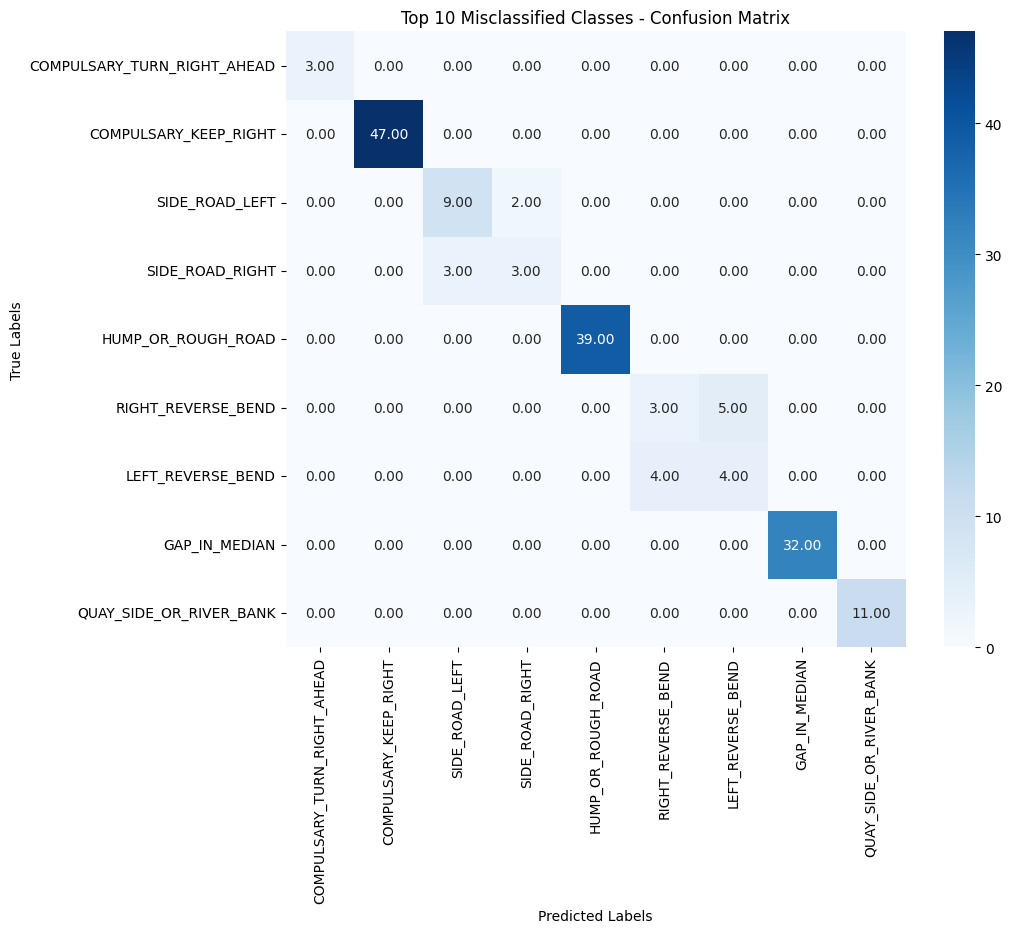

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Confusion Matrix saved at: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png
✅ File is also downloaded!


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ✅ Extract confusion matrix as a NumPy array
conf_matrix = metrics.confusion_matrix.matrix

# ✅ Find top 10 most misclassified classes
misclassified_counts = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # Errors per class
top_misclassified_indices = [i for i in np.argsort(misclassified_counts)[-10:] if i < len(metrics.names)]  # Ensure valid indices

# ✅ Extract the subset matrix
conf_matrix_subset = conf_matrix[np.ix_(top_misclassified_indices, top_misclassified_indices)]

# ✅ Get class names safely
class_names_subset = [metrics.names[i] for i in top_misclassified_indices]

# ✅ Plot the simplified confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_subset, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names_subset, yticklabels=class_names_subset)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Top 10 Misclassified Classes - Confusion Matrix")

# ✅ Save the plot
conf_matrix_path = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/confusion_matrix_top10.png"
plt.savefig(conf_matrix_path)
plt.show()

# ✅ Download the image
from google.colab import files
files.download(conf_matrix_path)

print(f"✅ Confusion Matrix saved at: {conf_matrix_path}")
print(f"✅ File is also downloaded!")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# ✅ Extract precision, recall, and F1-score values
precision = np.array(metrics.box.p)  # Precision values per class
recall = np.array(metrics.box.r)  # Recall values per class
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)  # Avoid division by zero

# ✅ Define file paths
output_dir = "/content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics"
os.makedirs(output_dir, exist_ok=True)
f1_curve_path = os.path.join(output_dir, "f1_curve.png")
pr_curve_path = os.path.join(output_dir, "pr_curve.png")


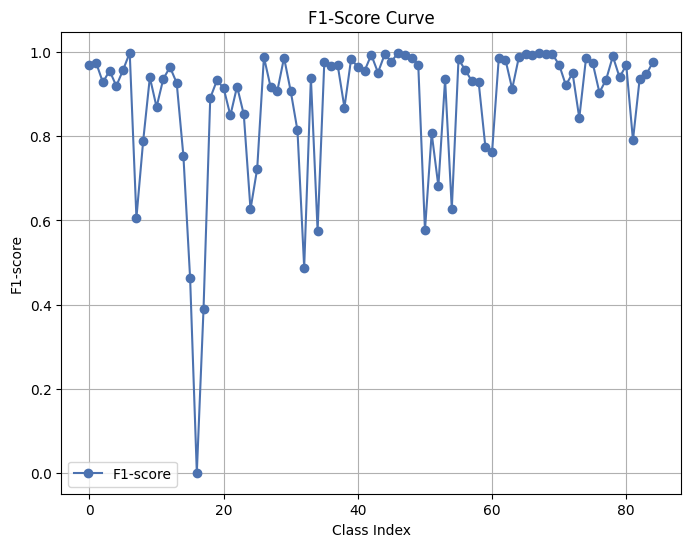

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ F1-Score curve saved at: /content/drive/MyDrive/Traffic_Sign_YOLOv11/Evaluation_Metrics/f1_curve.png


In [ ]:
# ✅ Plot the F1-Score curve
plt.figure(figsize=(8, 6))
plt.plot(range(len(f1_scores)), f1_scores, marker='o', linestyle='-', color='b', label="F1-score")
plt.xlabel("Class Index")
plt.ylabel("F1-score")
plt.title("F1-Score Curve")
plt.legend()
plt.grid()

# ✅ Save and Download
plt.savefig(f1_curve_path)
plt.show()
files.download(f1_curve_path)
print(f"✅ F1-Score curve saved at: {f1_curve_path}")
